11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\user\OneDrive\Desktop\PROJECT-MAJOR\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8938 - loss: 0.3464 - val_accuracy: 0.9832 - val_loss: 0.0490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9849 - loss: 0.0503 - val_accuracy: 0.9881 - val_loss: 0.0340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9897 - loss: 0.0326 - val_accuracy: 0.9892 - val_loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9896 - val_loss: 0.0345
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9944 - loss: 0.0164 - val_accuracy: 0.9919 - val_loss: 0.0272


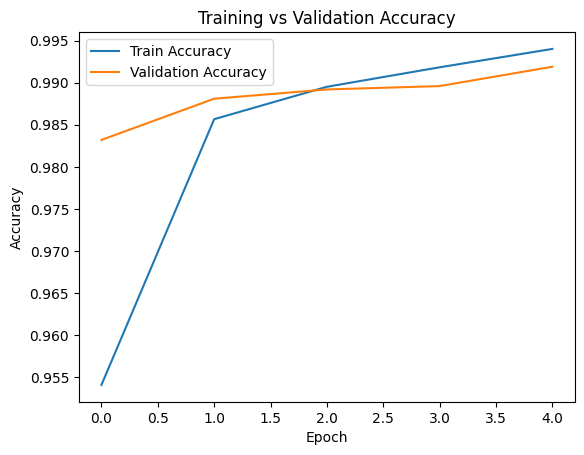

: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load and prepare MNIST dataset (placeholder for now)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize images and reshape to match CNN input
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 3. Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # For 10 digit classes (0–9)
])

# 4. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 7. Save model
model.save("models/starter_cnn_model.h5")
